#importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

#reading dataset

In [4]:

dataset=pd.read_csv('Add_sales_data_2018.csv')

In [5]:
dataset.head(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,4404.686
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,4418.709
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,4470.775
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,4425.005
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,4446.441


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [12]:
dataset.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No null values

In [7]:
dataset.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


#1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

In [9]:
dataset.drop(columns='Date').corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


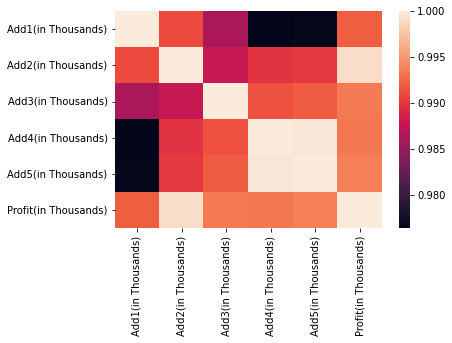

In [11]:
sns.heatmap(dataset.drop(columns='Date').corr())

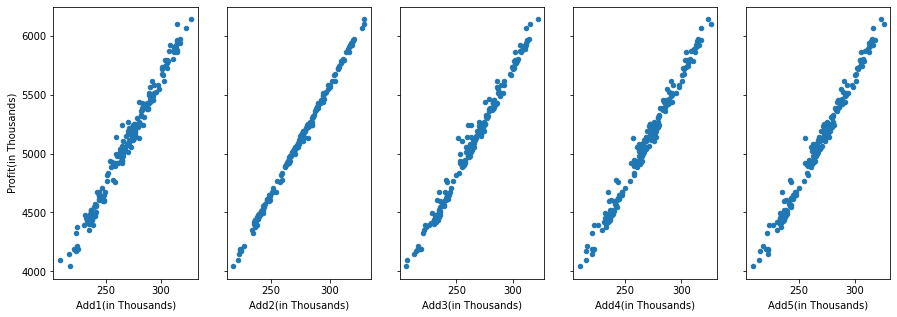

In [18]:
fig,axs= plt.subplots(1,5,sharey=True) # sharey : share same y axis across the plot
dataset.plot(kind="scatter",x='Add1(in Thousands)',y='Profit(in Thousands)',ax=axs[0],figsize=(15,5))
dataset.plot(kind="scatter",x='Add2(in Thousands)',y='Profit(in Thousands)',ax=axs[1],figsize=(15,5))
dataset.plot(kind="scatter",x='Add3(in Thousands)',y='Profit(in Thousands)',ax=axs[2],figsize=(15,5))
dataset.plot(kind="scatter",x='Add4(in Thousands)',y='Profit(in Thousands)',ax=axs[3],figsize=(15,5))
dataset.plot(kind="scatter",x='Add5(in Thousands)',y='Profit(in Thousands)',ax=axs[4],figsize=(15,5))

#2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [21]:
feature_x=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']
X=dataset[feature_x]
y=dataset['Profit(in Thousands)']

In [42]:
X

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [23]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.2,random_state=30)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(164, 5) (164,) (41, 5) (41,)


##creating linear regression model

In [24]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [25]:
print(lm.intercept_,lm.coef_)

0.0 [ 1.   12.38  3.5   1.    0.9 ]


##Model Prediction

In [41]:
pred=lm.predict(xtest)

In [27]:
pred

array([5184.204, 5858.34 , 4435.174, 4937.03 , 4890.723, 5498.553,
       4451.999, 4178.008, 5078.636, 5903.253, 5027.633, 4671.113,
       6062.457, 5421.842, 5962.336, 4390.996, 4435.816, 5890.012,
       5238.366, 5190.758, 5250.788, 5190.814, 5784.54 , 5430.79 ,
       4425.005, 4821.542, 5134.657, 4648.834, 5511.087, 5250.775,
       5145.131, 4599.49 , 5387.438, 4548.11 , 5175.051, 5131.898,
       4997.719, 5071.736, 5616.791, 5140.372, 4436.321])

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
print(sqrt(mean_squared_error(ytest,pred)))

8.159531343286388e-13


In [31]:
lm.score(X,y)

1.0

we got 100% accuracy in this model

##3.Predict the profit generated by the company, if they wish to spend thefollowing amount for advertisement.
Add1(in Thousands) : 290

Add2(in Thousands) : 312	

Add3(in Thousands) : 309

Add4(in Thousands) : 298
	 
Add5(in Thousands) :320



In [70]:
d = {'Add1(in Thousands)': [290],
     'Add2(in Thousands)': [312],
     'Add3(in Thousands)': [309],
     'Add4(in Thousands)': [298],
     'Add5(in Thousands)': [320],
        }
s = pd.DataFrame(d)

In [71]:
lm.predict(s)

array([5820.06])

we can see that it will produce a profit of 5820.06